In [ ]:
!pip install pandas
!pip install numpy
!pip install scipy
!pip install seaborn
!pip install matplotlib
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt


!pip install --upgrade scipy


In [ ]:
df_ab_test = pd.read_csv('/content/ab_test_click_data_all_string.csv')

#print(df_ab_test.head())
print(df_ab_test.describe())
print(df_ab_test.groupby("group").sum("click"))


            user_id         click
count  20000.000000  20000.000000
mean   10000.500000      0.081400
std     5773.647028      0.273455
min        1.000000      0.000000
25%     5000.750000      0.000000
50%    10000.500000      0.000000
75%    15000.250000      0.000000
max    20000.000000      1.000000
         user_id  click
group                  
con    150005000    542
exp     50005000   1086


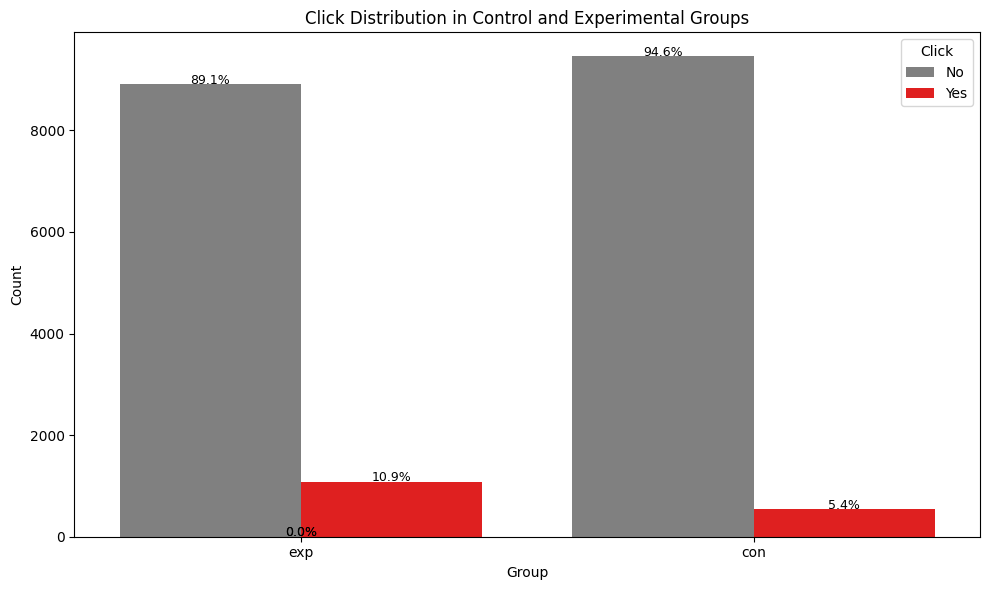

In [ ]:
palette = {0: 'grey', 1:'red'}
plt.figure(figsize=(10,6))
ax = sns.countplot(x='group', hue='click', data=df_ab_test, palette=palette)
plt.title('Click Distribution in Control and Experimental Groups')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title = 'Click', labels=['No','Yes'])

group_counts = df_ab_test.groupby(['group']).size()
group_click_counts = df_ab_test.groupby(['group','click']).size().reset_index(name='count')

for p in ax.patches:
    height = p.get_height()
    group = 'exp' if p.get_x() < 0.5 else 'con'
    click = 1 if p.get_x() % 1 > 0.5 else 0
    total = group_counts.loc[group]
    percentage = 100 * height/total
    ax.text(p.get_x() + p.get_width() /2., height + 5, f'{percentage:.1f}%', ha="center", color='black', fontsize=9)

plt.tight_layout()
plt.show()

Parameters of the model : Power anaysis

In [ ]:
alpha = 0.05
print("Alpha significane level is", alpha)

delta = 0.1
print("Delta significane level is", delta)


Alpha significane level is 0.05
Delta significane level is 0.1


Number of clicks per group


In [ ]:
N_con = df_ab_test[df_ab_test["group"] == "con"].count()
N_exp = df_ab_test[df_ab_test["group"] == "exp"].count()

print("Number of Users in Control:, N_con")
print("Number of Users in Experimental:, N_exp")

X_con = df_ab_test.groupby("group")["click"].sum().loc["con"]
X_exp = df_ab_test.groupby("group")["click"].sum().loc["exp"]

print(df_ab_test.groupby("group")["click"].sum())
print("Number of Users in Control:", N_con)
print("Number of Users in Experimental:", N_exp)
print("Number of Clicks in Control:", X_con)
print("Number of Clicks in Experimental:", X_exp)

Number of Users in Control:, N_con
Number of Users in Experimental:, N_exp
group
con     542
exp    1086
Name: click, dtype: int64
Number of Users in Control: user_id      10000
click        10000
group        10000
timestamp        0
dtype: int64
Number of Users in Experimental: user_id      10000
click        10000
group        10000
timestamp    10000
dtype: int64
Number of Clicks in Control: 542
Number of Clicks in Experimental: 1086


Pooled estimates for clicks per group

In [ ]:
p_con_hat = X_con/N_con
p_exp_hat = X_exp/N_exp
print("Click Probaility in Control Group:", p_con_hat)
print("Click Probaility in Experimental Group:", p_exp_hat)

p_pooled_hat = (X_con + X_exp)/(N_con + N_exp)
print("Pooled Click Probility:", p_pooled_hat)

Click Probaility in Control Group: user_id      0.0542
click        0.0542
group        0.0542
timestamp       inf
dtype: float64
Click Probaility in Experimental Group: user_id      0.1086
click        0.1086
group        0.1086
timestamp    0.1086
dtype: float64
Pooled Click Probility: user_id      0.0814
click        0.0814
group        0.0814
timestamp    0.1628
dtype: float64


Pooled Variance


In [ ]:
pooled_variance = p_pooled_hat * (1-p_pooled_hat) * (1/N_con + 1/N_exp)
print("p^_pooled is:", p_pooled_hat)
print("pooled_variance is:", pooled_variance)

p^_pooled is: user_id      0.0814
click        0.0814
group        0.0814
timestamp    0.1628
dtype: float64
pooled_variance is: user_id      0.000015
click        0.000015
group        0.000015
timestamp         inf
dtype: float64


Standard Error and Test Statisics

In [ ]:
SE = np.sqrt(pooled_variance)
print("Standard error is:",SE)

Test_stat = (p_con_hat - p_exp_hat)/SE
print("Test statistics for 2-sample Z-test :",Test_stat)

Z_crit = norm.ppf(1-alpha/2)
print("Z-critical value from Standard Normal Distribution:", Z_crit)

Standard error is: user_id      0.003867
click        0.003867
group        0.003867
timestamp         inf
dtype: float64
Test statistics for 2-sample Z-test : user_id     -14.067226
click       -14.067226
group       -14.067226
timestamp          NaN
dtype: float64
Z-critical value from Standard Normal Distribution: 1.959963984540054


p values of Z-test

In [ ]:
p_value = 2 * norm.sf(abs(Test_stat))
print("p-value of the 2-sample Z-test:", p_value)

def is_statistical_significance(p_value, alpha=0.05):
    """
    Assess statistical significance based on p-value and alpha.

    Arguments:
    - p_value (float): The p-value from a statistical test
    - alpha (float, optional): Significance level threshold. Defaults to 0.05.
    """
    if isinstance(p_value, np.ndarray):
        p_value = p_value[0]

    if p_value <= alpha:
        print("There is statistical significance, indicating that the observed differences between the groups are unlikely to have occurred by chance. This suggests the change made results in a higher statistically significant CTR than the existing version of the control group.")
    else:
        print("There is no statistical significance, suggesting that the observed differences between the groups could have occurred by chance. This suggests the change made does not result in a higher statistically significant CTR.")


# Use .item() to convert to a Python float
print(f"P-value: {float(np.round(p_value[0] if isinstance(p_value, np.ndarray) else p_value, 3))}")


is_statistical_significance(p_value,alpha)

p-value of the 2-sample Z-test: [6.03918409e-45 6.03918409e-45 6.03918409e-45            nan]
P-value: 0.0
There is statistical significance, indicating that the observed differences between the groups are unlikely to have occurred by chance. This suggests the change made results in a higher statistically significant CTR than the existing version of the control group.


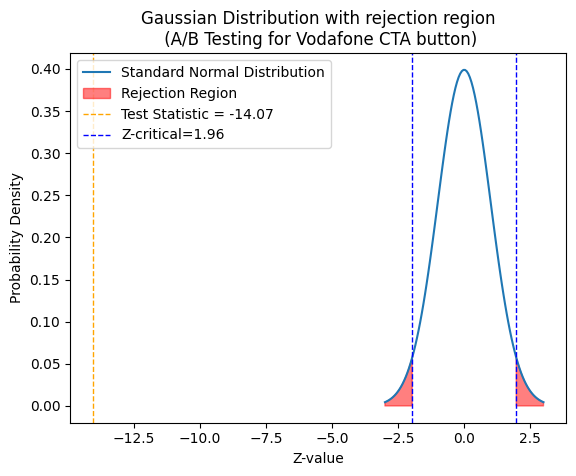

<ipython-input-15-e1c61a7b1dba>:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<function matplotlib.pyplot.show(close=None, block=None)>

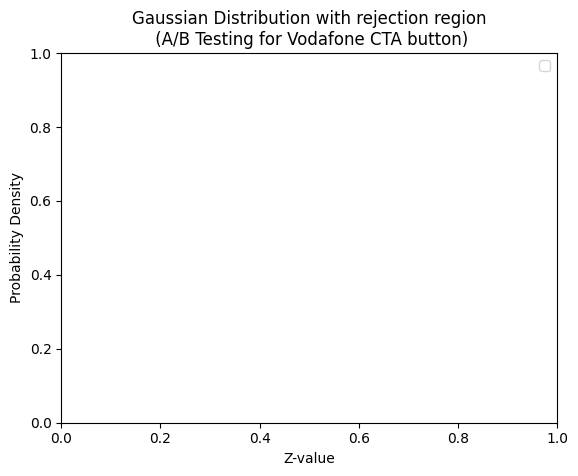

In [ ]:
mu= 0
sigma = 1
x= np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y= norm.pdf(x, mu, sigma)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu= 0
sigma = 1
x= np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma) #Calculate PDF
plt.plot(x, y, label='Standard Normal Distribution')

# Assuming Z_crit and Test_stat are defined elsewhere
plt.fill_between(x, y, where=(x > Z_crit) | (x < -Z_crit), color='red', alpha=0.5, label='Rejection Region')
# Assuming Test_stat is a pandas Series and you want to plot the first value
plt.axvline(Test_stat.iloc[0], color='orange', linestyle='dashed', linewidth=1, label=f'Test Statistic = {Test_stat.iloc[0]:.2f}')
plt.axvline(Z_crit, color='blue', linestyle='dashed', linewidth=1, label=f'Z-critical={Z_crit:.2f}')
plt.axvline(-Z_crit, color='blue', linestyle='dashed', linewidth=1)

plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution with rejection region\n (A/B Testing for Vodafone CTA button)')
plt.legend()

plt.show()

plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution with rejection region\n (A/B Testing for Vodafone CTA button)')
plt.legend()

plt.show

In [ ]:
n

Confidence interval of test

In [ ]:
CI = [
    round((p_exp_hat - p_con_hat) - SE*Z_crit, 3),
    round((p_exp_hat - p_con_hat) + SE*Z_crit, 3)
]
print("Confidence interval of 2-sample Z-test is:", CI)

Confidence interval of 2-sample Z-test is: [user_id      0.047
click        0.047
group        0.047
timestamp     -inf
dtype: float64, user_id      0.062
click        0.062
group        0.062
timestamp      NaN
dtype: float64]


narrow confidence interval
-good quality results
-sample is showing a great representation of population


Pracitcal Significance in A/B Testing


In [ ]:
def is_Practically_significant(delta, CI_95):
  """
  We assess here if the difference between the control and Experimental group is practically significant using the Minimum Detectable Effect (MDE)

  Arguements:
  - delta (float): The Minimum Detectable Effect (MDI) considered for practical significance
  -CI_95(tuple): A tuple representing the lowe and upper bounds of the 95% Confidence Intervel.

  Returns:
  -Prints wheter the experiment has pracitcal based on the MDE and CI
  """

  lower_bound_CI = CI_95[0]

  if delta >= lower_bound_CI:
    print(f"We have a pracitcal significance: \nWith MDE of {delta}, The diffenence between Control and Experimental group is practically signficant ")
    return True
  else:
    print(f"We do not have a pracitcal significance: \nWith MDE of {delta}, The diffenence between Control and Experimental group is not practically signficant ")
    return False

delta = 0.1
CI_95 = (0.04,0.06)

significance = is_Practically_significant(delta, CI_95)
print("Lower bound of 95% confidence interval is:", CI_95[0])

delta = 0.1
CI_95 = (0.04,0.06)

significance = is_Practically_significant(delta, CI_95)
print("Lower bound of 95% confidence interval is:", CI_95[0])


We have a pracitcal significance: 
With MDE of 0.1, The diffenence between Control and Experimental group is practically signficant 
Lower bound of 95% confidence interval is: 0.04
We have a pracitcal significance: 
With MDE of 0.1, The diffenence between Control and Experimental group is practically signficant 
Lower bound of 95% confidence interval is: 0.04
